<a href="https://colab.research.google.com/github/abhishekchauhan062003/CODSOFT/blob/main/creditcardfrauddetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kartik2112/fraud-detection")

print("Path to dataset files:", path)

100%|██████████| 202M/202M [00:03<00:00, 61.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kartik2112/fraud-detection/versions/1


In [ ]:
path_train = "/root/.cache/kagglehub/datasets/kartik2112/fraud-detection/versions/1/fraudTrain.csv"
path_test = "/root/.cache/kagglehub/datasets/kartik2112/fraud-detection/versions/1/fraudTest.csv"


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1  = pd.read_csv(path_train)
df2 = pd.read_csv(path_test)

In [ ]:
df = pd.concat([df1,df2])

In [ ]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               i

In [ ]:
df.isnull().values.any()

False

<ipython-input-61-29507fadc12c>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['is_fraud'], sort = True)


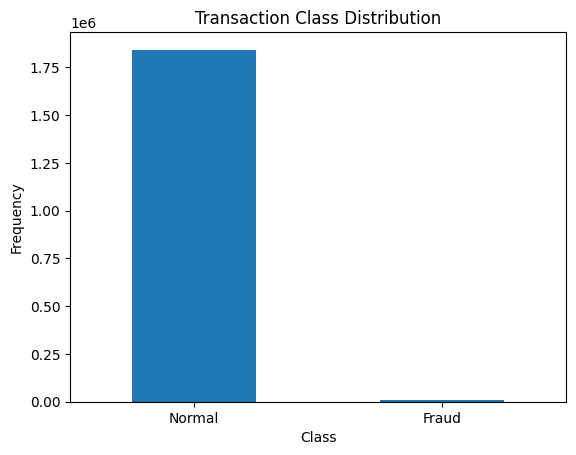

In [ ]:
count_classes = pd.value_counts(df['is_fraud'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
LABELS = ["Normal", "Fraud"]
plt.xticks(range(2),LABELS)
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency");

In [ ]:
fraud = df[df["is_fraud"]==1]
normal = df[df["is_fraud"]==0]

In [ ]:
fraud.shape, normal.shape

((9651, 23), (1842743, 23))

In [ ]:
normal = normal.sample(fraud.shape[0])
data = pd.concat([fraud,normal])


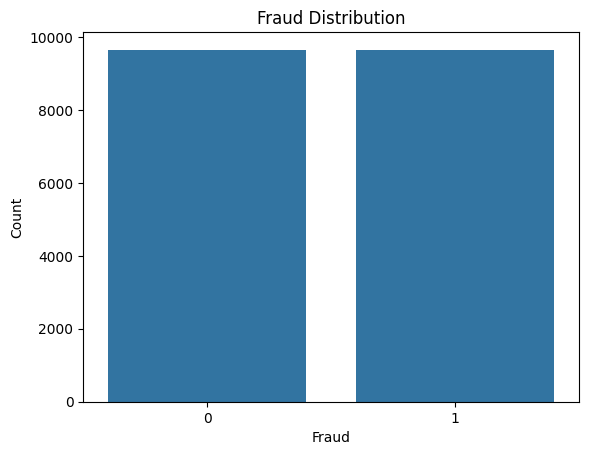

In [ ]:
fraud_counts = data['is_fraud'].value_counts()
sns.barplot(x=fraud_counts.index,y=fraud_counts.values)
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.title('Fraud Distribution')
plt.show()


In [ ]:
unused_cols = ['Unnamed: 0','first','last','unix_time','street','gender','job','dob','city','state','trans_num','merchant']
data.drop(columns=unused_cols,inplace=True)

In [ ]:
data.head()

,trans_date_trans_time,cc_num,category,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud
2449,2019-01-02 01:06:37,4613314721966,grocery_pos,281.06,28611,35.9946,-81.7266,885,36.430124,-81.179483,1
2472,2019-01-02 01:47:29,340187018810220,gas_transport,11.52,78208,29.4400,-98.4590,1595797,29.819364,-99.142791,1
2523,2019-01-02 03:05:23,340187018810220,grocery_pos,276.31,78208,29.4400,-98.4590,1595797,29.273085,-98.836360,1
2546,2019-01-02 03:38:03,4613314721966,gas_transport,7.03,28611,35.9946,-81.7266,885,35.909292,-82.091010,1
2553,2019-01-02 03:55:47,340187018810220,grocery_pos,275.73,78208,29.4400,-98.4590,1595797,29.786426,-98.683410,1


In [ ]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['trans_day'] = data['trans_date_trans_time'].dt.day
data['trans_month'] = data['trans_date_trans_time'].dt.month
data['trans_year'] = data['trans_date_trans_time'].dt.year
data['trans_hour'] = data['trans_date_trans_time'].dt.hour
data['trans_minute'] = data['trans_date_trans_time'].dt.minute
data['trans_second'] = data['trans_date_trans_time'].dt.second
data.drop(columns=['trans_date_trans_time'],inplace=True)

In [ ]:
data.head()

,cc_num,category,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,trans_day,trans_month,trans_year,trans_hour,trans_minute,trans_second
2449,4613314721966,grocery_pos,281.06,28611,35.9946,-81.7266,885,36.430124,-81.179483,1,2,1,2019,1,6,37
2472,340187018810220,gas_transport,11.52,78208,29.4400,-98.4590,1595797,29.819364,-99.142791,1,2,1,2019,1,47,29
2523,340187018810220,grocery_pos,276.31,78208,29.4400,-98.4590,1595797,29.273085,-98.836360,1,2,1,2019,3,5,23
2546,4613314721966,gas_transport,7.03,28611,35.9946,-81.7266,885,35.909292,-82.091010,1,2,1,2019,3,38,3
2553,340187018810220,grocery_pos,275.73,78208,29.4400,-98.4590,1595797,29.786426,-98.683410,1,2,1,2019,3,55,47


In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
encoder = LabelEncoder()
data['category'] = encoder.fit_transform(data['category'])
data['cc_num'] = encoder.fit_transform(data['cc_num'])

In [ ]:
scaler=StandardScaler()
data['amt']=scaler.fit_transform(data[['amt']])
data['zip']=scaler.fit_transform(data[['zip']])
data['city_pop']=scaler.fit_transform(data[['city_pop']])
data['cc_num']=encoder.fit_transform(data['cc_num'])

In [ ]:
X=data.drop('is_fraud',axis=1)
y=data['is_fraud']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score

## RANDOM FOREST CLASSIFIER

In [ ]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(X_train,y_train)
y_pred = RFC.predict(X_test)

In [ ]:
print('Accuracy:',accuracy_score(y_test, y_pred))
print('Precision:',precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))
print('Confusion matrix:',confusion_matrix(y_test, y_pred))

Accuracy: 0.9637399637399637
Precision: 0.973030142781597
Recall: 0.9538621047174702
F1 score: 0.9633507853403142
Confusion matrix: [[1881   51]
 [  89 1840]]


Text(0.5, 1.0, 'Confusion Matrix')

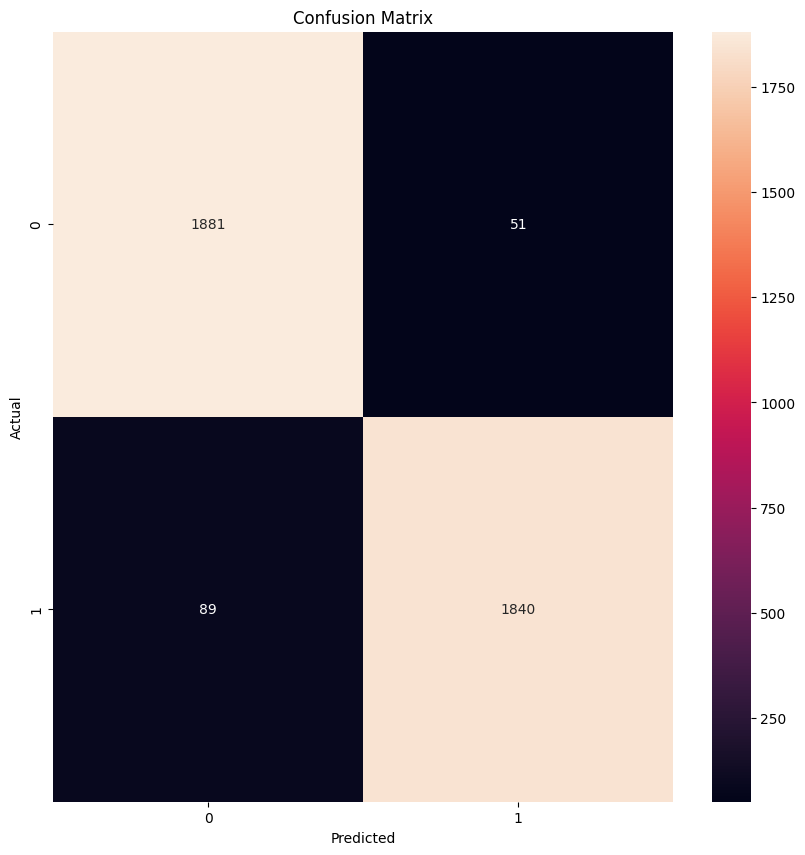

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

## DECISION TREE CLASSIFIER

In [ ]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)
y_pred = DTC.predict(X_test)

In [ ]:
print('Accuracy:',accuracy_score(y_test, y_pred))
print('Precision:',precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))
print('Confusion matrix:',confusion_matrix(y_test, y_pred))

Accuracy: 0.9614089614089614
Precision: 0.9592363261093911
Recall: 0.9637117677553136
F1 score: 0.9614688388931989
Confusion matrix: [[1853   79]
 [  70 1859]]


Text(0.5, 1.0, 'Confusion Matrix')

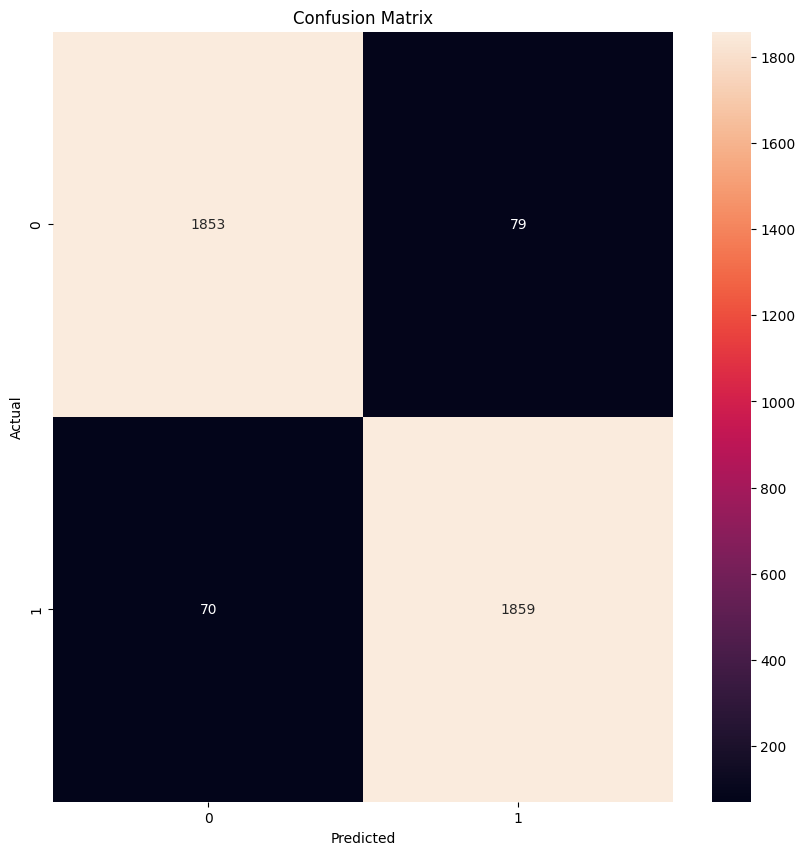

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')